In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [68]:
df = pd.read_csv('abalone.csv')
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [69]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [70]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [71]:
df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [72]:
X = df.drop(['Rings', 'id'], axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [73]:
y = df['Rings']

In [74]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [75]:
y.value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [76]:
Y = pd.get_dummies(y).values

In [77]:
X = X.values

In [78]:
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [79]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [80]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [81]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341, 28), (836, 28))

In [83]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(5, input_shape=(8,),activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mse'])

model.summary()

/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 9/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0345 

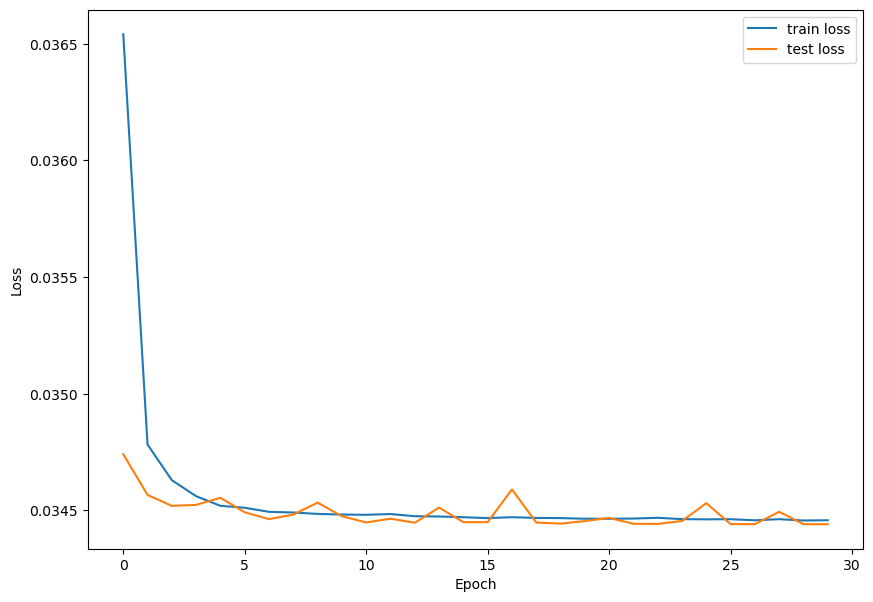

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [92]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344


[0.03444070369005203, 0.03444070369005203]